In [21]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# Reconstruindo os resultados

In [22]:
dscores = {}
for flog in os.listdir("outputs/models/"):
    with open(f"outputs/models/{flog}", 'r') as fd:
        dscores[flog.replace(".json",'')] = json.load(fd)

In [23]:
def get_params(key):
    
    tokens = key.split('_')
    wsize = int(tokens[1].split('-')[-1])
    vsize = int(tokens[3].split('-')[-1])
    sg = int(tokens[4].split('-')[-1])
    mcount = int(tokens[-1].split('-')[-1])

    return wsize, vsize, sg, mcount

rows = []
# Para cada modelo.
for key in dscores:
    wsize, vsize, sg, mcount = get_params(key)
    # para cada categoria no modelo.
    for categ in dscores[key]:
        try:
            hits = dscores[key][categ]["hits"]
            misses = dscores[key][categ]["misses"]
            close_to = dscores[key][categ]["close_to"]
            score = dscores[key][categ]["score"]
            rows.append([categ, vsize, wsize, sg, mcount, hits, misses, close_to, score])
        except:
            print(key)


In [24]:
cols = ['category', 'vector_size', 'window_size', 'sg', 'min_count', 'hits', 'misses', 'close_to', 'score']
df = pd.DataFrame(rows, columns=cols)
df.head()

,category,vector_size,window_size,sg,min_count,hits,misses,close_to,score
0,: capital-common-countries,100,1,1,1,0,506,0,0.000000
1,: capital-world,100,1,1,1,0,4216,0,0.000000
2,: currency,100,1,1,1,0,866,0,0.000000
3,: city-in-state,100,1,1,1,0,2467,0,0.000000
4,: family,100,1,1,1,38,301,81,65.224211


In [36]:
def plot_distib(df, var_target, observed_vars=['hits', 'misses', 'score', 'close_to']):
    
    plt.figure(figsize=(25,4))
    cont = 1
    flag_legend = True
    # Para cada variável de interesse.
    for tvar in observed_vars:
        max_value = 0
        for categ in set(df.category):
            categ_df = df[df.category == categ].sort_values(by=[var_target])
            x_labels = categ_df[var_target].values
            x = list(range(1, len(x_labels) + 1))
            y = categ_df[tvar].values
            plt.subplot(1,4, cont)
            plt.yticks(fontsize=14)
            if flag_legend:
                plt.plot(x, y, label=categ)
            else:
                plt.plot(x, y)
            plt.xticks(x, x_labels, fontsize=14)
        # Formatando os gráficos.
        plt.xticks(x, x_labels, fontsize=14, rotation=45)
        plt.xlabel(var_target, fontsize=14)
        plt.ylabel(tvar, fontsize=14)
        plt.grid()
        cont += 1
        flag_legend = False
    plt.figlegend(ncol=4, loc="upper center", fontsize=16, bbox_to_anchor =(0.65, 1.25))#, borderpad=0.3)

def plot_distib_average(df, var_target, observed_vars=['hits', 'misses', 'score', 'close_to']):
    
    plt.figure(figsize=(25,4))
    cont = 1
    flag_legend = True
    # Para cada variável de interesse.
    for tvar in observed_vars:
        # Calculando os valores médios.
        plt.subplot(1,4, cont)
        y = df.groupby(var_target).agg({tvar: "mean"}).sort_values(by=[var_target]).values
        y = y.reshape(y.shape[0])
        y_std = df.groupby(var_target).agg({tvar: "std"}).values
        y_std = y_std.reshape(y_std.shape[0])
        x_labels = df[df.category == df.category.iloc[0]].sort_values(by=[var_target])[var_target]
        x = list(range(1, len(x_labels) + 1))
        if flag_legend:
            plt.errorbar(x, y, y_std, label="Average", marker='o')
            flag_legend = False
        else:
            plt.errorbar(x, y, y_std, marker='o')
        # Formatando os gráficos.
        plt.xticks(x, x_labels, fontsize=14, rotation=45)
        plt.xlabel(var_target, fontsize=14)
        plt.ylabel(tvar, fontsize=14)
        plt.grid()
        cont += 1
    plt.figlegend(ncol=4, loc="upper center", fontsize=16)

# Análise do tamanho da janela (window_size)

### Fixando os demais parâmetros para a análise. Dimensão dos vetores 100, Skip-Gram ativado, Frequência mínima das palavras 1.

In [25]:
window_df = df[(df.vector_size == 100) & (df.sg == 1) & (df.min_count == 1)]
window_df.head(5)

,category,vector_size,window_size,sg,min_count,hits,misses,close_to,score
0,: capital-common-countries,100,1,1,1,0,506,0,0.000000
1,: capital-world,100,1,1,1,0,4216,0,0.000000
2,: currency,100,1,1,1,0,866,0,0.000000
3,: city-in-state,100,1,1,1,0,2467,0,0.000000
4,: family,100,1,1,1,38,301,81,65.224211


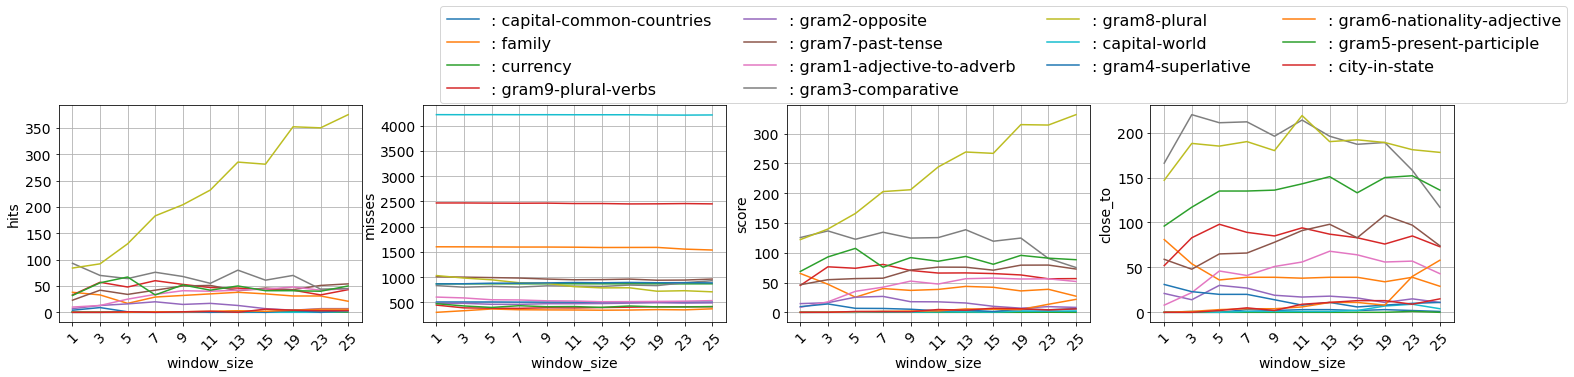

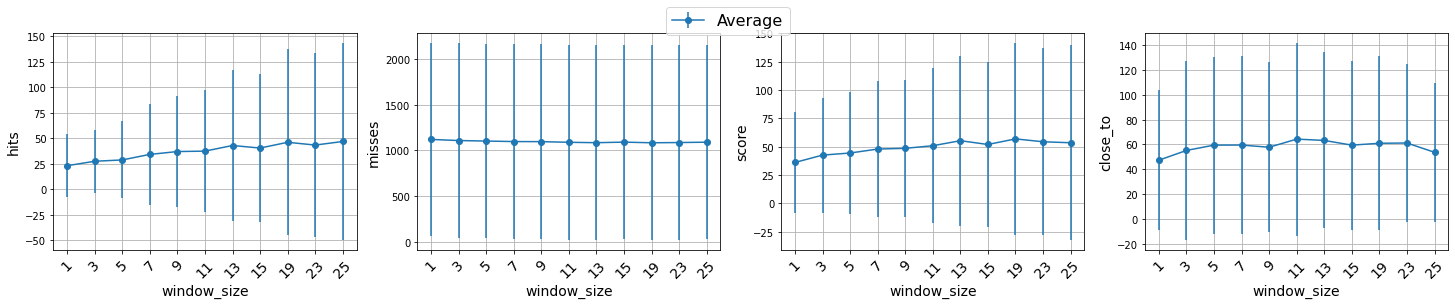

In [37]:
plot_distib(window_df, 'window_size')
plot_distib_average(window_df, 'window_size')

# Analisando a dimensão do embedding (vector_size)

### Fixando os demais parâmetros para a análise. Tamanho da janela 5, Skip-Gram ativado, Frequência mínima das palavras 1.

In [27]:
vector_df = df[(df.window_size == 5) & (df.sg == 1) & (df.min_count == 1)]
vector_df.head(5)

,category,vector_size,window_size,sg,min_count,hits,misses,close_to,score
56,: capital-common-countries,200,5,1,1,0,506,0,0.000000
57,: capital-world,200,5,1,1,0,4216,0,0.000000
58,: currency,200,5,1,1,0,866,0,0.000000
59,: city-in-state,200,5,1,1,0,2466,1,0.156486
60,: family,200,5,1,1,33,344,43,38.169100


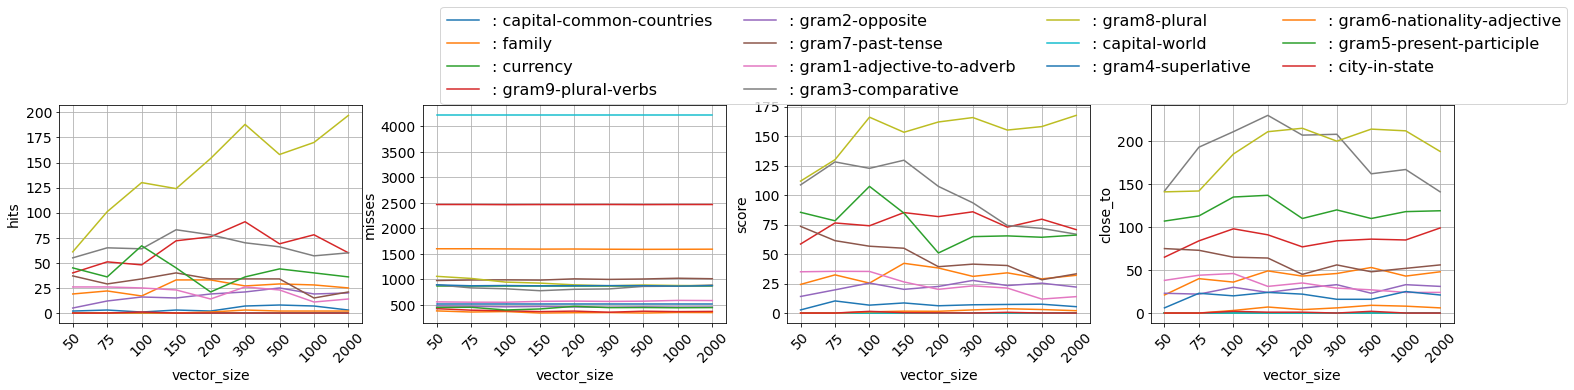

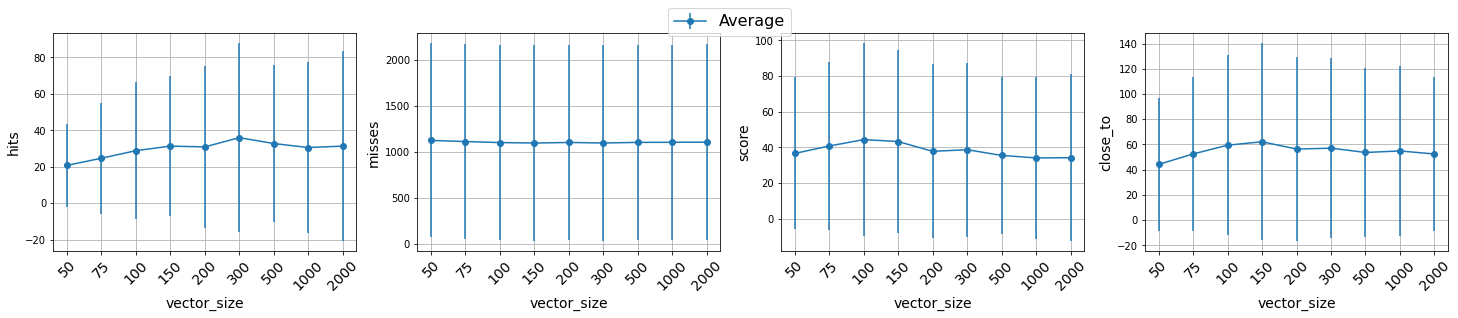

In [38]:
plot_distib(vector_df, 'vector_size')
plot_distib_average(vector_df, 'vector_size')

In [29]:
skip_cbow = df[(df.window_size == 5) & (df.vector_size == 100) & (df.min_count == 1)]
skip_cbow.head(5)

,category,vector_size,window_size,sg,min_count,hits,misses,close_to,score
28,: capital-common-countries,100,5,0,1,0,506,0,0.000000
29,: capital-world,100,5,0,1,0,4214,2,0.357964
30,: currency,100,5,0,1,0,866,0,0.000000
31,: city-in-state,100,5,0,1,0,2463,4,1.707354
32,: family,100,5,0,1,16,370,34,23.920499


In [30]:
def identity(x):
    return x

tabs = []
for col in ["hits", "misses", "score", "close_to"]:
    t = pd.crosstab(skip_cbow.category, skip_cbow.sg, values=skip_cbow[col].values, aggfunc=identity)
    tabs.append(t)

In [31]:
table = pd.concat(tabs, axis=1)
table

sg,0,1,0,1,0,1,0,1
category,,,,,,,,
: capital-common-countries,0,0,506,506,0.000000,0.000000,0,0
: capital-world,0,0,4214,4216,0.357964,0.000000,2,0
: city-in-state,0,1,2463,2464,1.707354,1.429811,4,2
: currency,0,0,866,866,0.000000,0.000000,0,0
: family,16,17,370,367,23.920499,25.380842,34,36
: gram1-adjective-to-adverb,11,25,579,550,20.230288,35.254525,31,46
: gram2-opposite,1,16,503,460,1.712443,25.407169,2,30
: gram3-comparative,26,64,988,814,45.030943,122.622815,75,211
: gram4-superlative,0,1,896,878,0.521419,6.689974,3,20


In [32]:
agg = { m: "mean" for m in ['hits', 'misses', 'score', 'close_to'] }

g = skip_cbow.groupby(by="sg").agg(agg)
g

,hits,misses,score,close_to
sg,,,,
0,19.428571,1129.642857,33.266248,41.357143
1,28.785714,1102.285714,44.409421,59.357143


In [33]:
gt = g.T
gtr = gt.values.T.reshape(gt.shape[0] * 2)
pd.DataFrame(gtr).T

,0,1,2,3,4,5,6,7
0,19.428571,1129.642857,33.266248,41.357143,28.785714,1102.285714,44.409421,59.357143


# Avaliação da quantidade frequência mínima das palavras

In [34]:
min_count_df = df[(df.window_size == 5) & (df.vector_size == 100) & (df.sg == 1)]
min_count_df.head(5)

,category,vector_size,window_size,sg,min_count,hits,misses,close_to,score
14,: capital-common-countries,100,5,1,5,0,505,1,0.213002
15,: capital-world,100,5,1,5,0,3563,1,0.213002
16,: currency,100,5,1,5,0,721,0,0.000000
17,: city-in-state,100,5,1,5,1,2327,2,1.092888
18,: family,100,5,1,5,21,311,29,25.240842


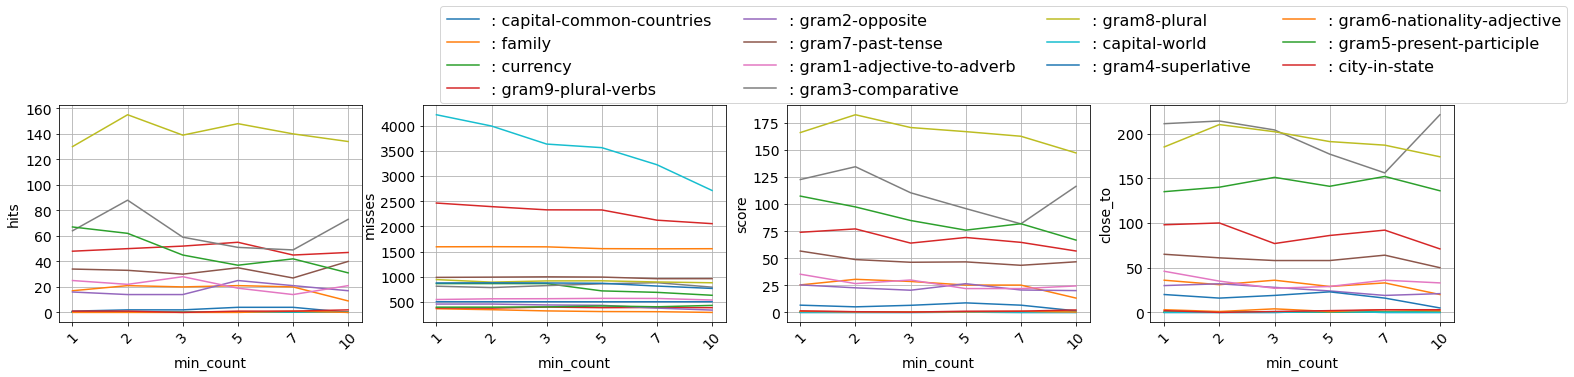

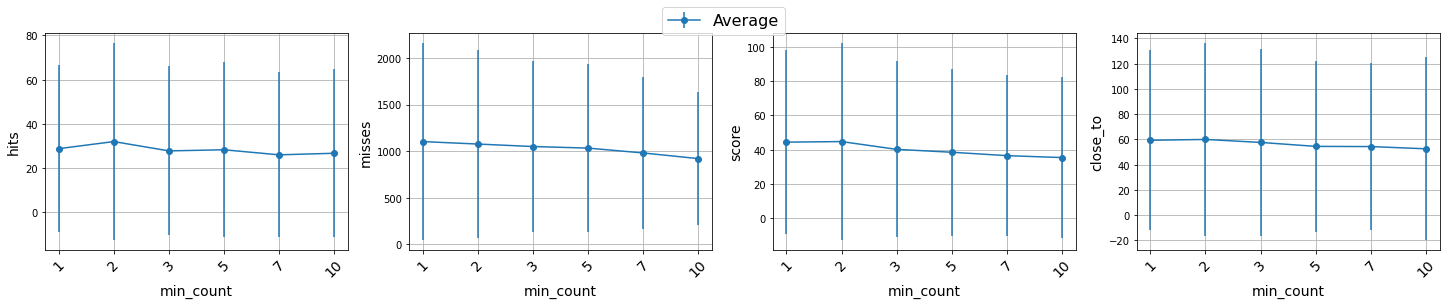

In [39]:
plot_distib(min_count_df, 'min_count')
plot_distib_average(min_count_df, 'min_count')